<center><b>
<span style="font-size: 2em;">
AircraftDesignTools Documentation</span><br><span style="font-size: 1em;">
Last Update: 07/2019</span>  
</b></center>

In [1]:
import PyPlot

using AircraftDesignTools
adt = AircraftDesignTools

data_path = "data/"
airfoil_path = joinpath(data_path, "airfoil/")
save_path = "temps/";

# Table of Contents

In [2]:
macro javascript_str(s) display("text/javascript", s); end

javascript"""
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')
"""

# Components

A component is any object in space that has mass. Components can be volumetric, surface, or point objects.

In [3]:
? adt.Component

```
`Component(name::String, object::ObjectTypes; optargs...) <: AbstractComponent`
```

Defines an object with the location and orientation given by the shape definition of `object`.

**OPTIONAL ARGUMENTS**

  * `id::Union{Int,String}`       : Component number identifier
  * `description::String`         : Useful description
  * `comments::String`            : Vent about your life here
  * `vendor::String`              : Vendor information
  * `cost::Real`                  : Cost of this component


In order to define a componet, first we need to define a shape and a massified object that uses that shape as shown below.

## Shape Definition

A Shape is any set of parameters used for calculating an associated volume, area, and centroid.

In [4]:
? adt.AbstractShape

Implementations of AbstractShape are expected to have the following fields

  * `units::String`     : Units of the length dimensions.

and the following functions

```julia
    "Returns the volume of this shape"
    volume(self::ShapeType) = ...

    "Returns the surface area of this shape"
    area(self::ShapeType) = ...

    "Returns a tuple (x1, x2, x3) with the coordinates of the shape centroid"
    centroid(self::ShapeType) = ...

    "Generates a vtk file with this shape and returns the name of the vtk file"
    save_vtk(self::ShapeType, filename; optargs...) = ...
```


The constant variable `ShapeTypes` contains all the concrete implementations of `AbstractShape` implemented in the module:

In [5]:
adt.ShapeTypes

Union{AircraftDesignTools.ShapeCuboid, AircraftDesignTools.ShapeCyl, AircraftDesignTools.ShapePoint, AircraftDesignTools.ShapeSphere, AircraftDesignTools.ShapeSurfGrid}

Here are three simple shapes:

In [6]:
? adt.ShapeCuboid

```
`ShapeCuboid(x1::Real, x2::Real, x3::Real, units::String)`
```

Cuboid shape formed by six parallelograms (3D rectangle)


In [7]:
? adt.ShapeCyl

```
`ShapeCyl(r::Real, h::Real, units::String)`
```

Cylindrical shape


In [8]:
? adt.ShapeSphere

```
`ShapeSphere(r::Real, units::String)`
```

Spherical shape


For defining point masses, use the following volume-less shape:

In [9]:
? adt.ShapePoint

```
`ShapePoint(units::String)`
```

A volume-less point


In the following example we define a cylinder of unit radius and height. Units can be explicitely specified, otherwise it will default to MKS metric units:

In [10]:
cyl = ShapeCyl(1.0, 1.0)

AircraftDesignTools.ShapeCyl{Float64}(1.0, 1.0, "m")

In [11]:
cyl = ShapeCyl(1.0, 1.0, "in")

AircraftDesignTools.ShapeCyl{Float64}(1.0, 1.0, "in")

In [12]:
println("Volume:\t\t",   volume(cyl), volumeunits(cyl))
println("Surface area:\t", area(cyl), areaunits(cyl))
println("Centroid:\t", centroid(cyl), centroidunits(cyl))

Volume:		3.141592653589793in^3
Surface area:	12.566370614359172in^2
Centroid:	(0.0, 0.0, 0.5)in


## Massified-Object Definition

An Object is simply a wrapper associating a density of mass to a shape.

In [13]:
? adt.AbstractObject

Implementations of AbstractObject are expected to have the following fields

  * `shape::ShapeType`      : Shape of object.
  * `density::Real`         : density of object.
  * `dunits::String`        : Units of density.

and the following functions

```julia

    "Returns the mass-normalizing value (volume, area, etc)"
    _v(::Type{O}, shape::S) where {O<:ObjectPoint, S<:ShapeTypes} = ...

    "Returns the mass-normalizing units"
    _vunits(::Type{O}, shape::S) where {O<:ObjectPoint, S<:ShapeTypes} = ...
```


The constant variable `ObjectTypes` contains all the concrete implementations of `AbstractObject` implemented in the module:

In [14]:
adt.ObjectTypes

Union{AircraftDesignTools.ObjectPoint, AircraftDesignTools.ObjectSurf, AircraftDesignTools.ObjectVol}

There are three implementation associated to objects with mass distributed over a volume, a surface, or a point mass:

In [15]:
? adt.ObjectVol

```
`ObjectVol(shape, density)`
```

Volumetric object with shape and mass properties assuming uniform density.


In [16]:
? adt.ObjectSurf

```
`ObjectVol(shape, density)`
```

Surface object with shape and mass properties assuming uniform area-based density.


In [17]:
? adt.ObjectPoint

```
`ObjectPoint(mass)`
```

A volume-less point object.


The following example defines a $1\times2\times3\,\mathrm{m}^3$ block of styrofoam ($50\,\mathrm{kg/m^3}$ density)

In [18]:
block = ShapeCuboid(1.0, 2.0, 3.0)
density = 50.0
styblock = ObjectVol(block, density)

AircraftDesignTools.ObjectVol{AircraftDesignTools.ShapeCuboid{Float64},Float64}(AircraftDesignTools.ShapeCuboid{Float64}(1.0, 2.0, 3.0, "m"), 50.0, "kg/m^3")

In [19]:
println("Mass:\t\t\t",   mass(styblock), massunits(styblock))
println("Center of gravity:\t", cg(styblock), cgunits(styblock))

Mass:			300.0kg
Center of gravity:	(0.5, 1.0, 1.5)m


In the example the units default to MKS metric, but they can also be explicitely declared:

In [20]:
block = ShapeCuboid(100.0, 200.0, 300.0, "cm")
density = 0.05
styblock = ObjectVol(block, density, "g/cm^3")

AircraftDesignTools.ObjectVol{AircraftDesignTools.ShapeCuboid{Float64},Float64}(AircraftDesignTools.ShapeCuboid{Float64}(100.0, 200.0, 300.0, "cm"), 0.05, "g/cm^3")

In [21]:
println("Mass:\t\t\t",   mass(styblock), massunits(styblock))
println("Center of gravity:\t", cg(styblock), cgunits(styblock))

Mass:			300000.0g
Center of gravity:	(50.0, 100.0, 150.0)cm


When we are defining hollow objects is convenient to work with area-density rather than volumetric density, which can be done through the `ObjectSurf` Object. For instance, here I define a $5''\times5''\times20''$ box made out of cloroplast cardboard:

In [22]:
box = ShapeCuboid(5.0, 5.0, 20.0, "in")
density = 0.00068698539
cardboardbox = ObjectSurf(box, density, "lb/in^2")

AircraftDesignTools.ObjectSurf{AircraftDesignTools.ShapeCuboid{Float64},Float64}(AircraftDesignTools.ShapeCuboid{Float64}(5.0, 5.0, 20.0, "in"), 0.00068698539, "lb/in^2")

In [23]:
println("Mass:\t\t\t",   mass(cardboardbox), massunits(cardboardbox))
println("Center of gravity:\t", cg(cardboardbox), cgunits(cardboardbox))

Mass:			0.3091434255lb
Center of gravity:	(2.5, 2.5, 10.0)in


If you know the mass and shape of a component, you can define the object directly from the mass through `object_from_mass(shape, mass)`:

In [24]:
? adt.object_from_mass

```
`object_from_mass(shape::AbstractShape, mass::Real;
objecttype=ObjectVol{S, R}, massunits="kg")`
```

Returns an object of type `objecttype` where the density is calculated from the given mass and shape.


For instance, here I define a motor from the dimensions and weight that they report in HobbyKing:

In [25]:
motor_shape = ShapeCyl(
                        2.5/2,                      # (cm) radius
                        2.0,                        # (cm) height
                        "cm"
                       )
motor_obj = object_from_mass(
                        motor_shape,
                        52.0;                       # (g) mass
                        massunits="g"
                       )

AircraftDesignTools.ObjectVol{AircraftDesignTools.ShapeCyl{Float64},Float64}(AircraftDesignTools.ShapeCyl{Float64}(1.25, 2.0, "cm"), 5.296676506098277, "g/cm^3")

In [26]:
println("Density:\t\t", motor_obj.density, motor_obj.dunits)
println("Mass:\t\t\t",   mass(motor_obj), massunits(motor_obj))
println("Center of gravity:\t", cg(motor_obj), cgunits(motor_obj))

Density:		5.296676506098277g/cm^3
Mass:			52.0g
Center of gravity:	(0.0, 0.0, 1.0)cm


The way that the mass distributes over the object (i.e., volumetric, surface, or point distribution) can be specified through the keyword `objecttype`. For instance, here I define the same motor as a point mass:

In [27]:
motor_shape = ShapePoint()
motor_obj = object_from_mass(
                        motor_shape,
                        52.0;                       # (g) mass
                        massunits="g",
                        objecttype=ObjectPoint
                       )

AircraftDesignTools.ObjectPoint{AircraftDesignTools.ShapePoint{Float64},Float64}(AircraftDesignTools.ShapePoint{Float64}(""), 52.0, "g")

In [28]:
println("Density:\t\t", motor_obj.density, motor_obj.dunits)
println("Mass:\t\t\t",   mass(motor_obj), massunits(motor_obj))
println("Center of gravity:\t", cg(motor_obj), cgunits(motor_obj))

Density:		52.0g
Mass:			52.0g
Center of gravity:	(0.0, 0.0, 0.0)


## Component Definition

Components are massified shapes located and oriented in space, allowing to create a system of components with a common center of gravity that changes as the components move in space. Also, components carry technical information (it is all soft data, meaning that no computation is performed on such data), allowing to create bill of materials and cost analyses.

In [29]:
? adt.AbstractComponent

```
`AbstractComponent`
```

Implementations of AbstractComponent are expected to have the following fields

  * `name::String`                : Name of this component
  * `subcomponents`               : Subcomponents that make this component
  * `id::Union{Int,String}`       : Component number identifier
  * `description::String`         : Useful description
  * `comments::String`            : Vent about your life here
  * `vendor::String`              : Vendor information
  * `cost::Real`                  : Cost of this component

and the following functions

```julia
    "Saves a vtk file of this component and returns a string with file names"
    save_shape(cmp::ComponentType, file_name; path="", num=-1) = ...

    "Returns the number of items that make this component"
    Base.length(cmp::ComponentType) = ...
```


The constant variable `ComponentTypes` contains all the concrete implementations of `AbstractComponent` implemented in the module:

In [30]:
adt.ComponentTypes

Union{AircraftDesignTools.Component, AircraftDesignTools.System}

`Component` is the basic data structure of an object in space defining its own implicit local coordinate system. `System` allows to define a system of components or a system of systems. Notice that a system is defined as an `AbstractComponent`, meaning that conceptually a system is simply a component made out of subcomponents. A system defines a local coordinate system where its subcomponents are placed relative to each other. `System` will be explained in the next section.

In [31]:
? adt.Component

```
`Component(name::String, object::ObjectTypes; optargs...) <: AbstractComponent`
```

Defines an object with the location and orientation given by the shape definition of `object`.

**OPTIONAL ARGUMENTS**

  * `id::Union{Int,String}`       : Component number identifier
  * `description::String`         : Useful description
  * `comments::String`            : Vent about your life here
  * `vendor::String`              : Vendor information
  * `cost::Real`                  : Cost of this component


In the following example we define a 1000kv brushless motor:

In [32]:
# Shape of the motor
motor1000kv_shape = ShapeCyl(
                        2.5/2 / 100,                # (m) radius
                        2 / 100,                    # (m) height
                        "m"
                       )

# Massified object of the motor
motor1000kv_obj = object_from_mass(
                        motor1000kv_shape,
                        52 / 1000;                  # (kg) mass
                        massunits="kg"
                       )

# Component definition
motor1000kv = Component(
                        "Motor",                    # Name
                        motor1000kv_obj;            # Object
                        id="motor1000kv",           # Identifier
                        # Extra information
                        description="Turnigy D2830-11 1000kv Brushless Motor",
                        comments="1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S) ",
                        vendor="https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html",
                        cost=11
                       )

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Motor,motor1000kv,,Turnigy D2830-11 1000kv Brushless Motor,"1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S)",https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html,11,1,11


# Systems

`System` allows to define a system of components or a system of systems. Notice that a system is defined as an `AbstractComponent`, meaning that conceptually a system is simply a component made out of subcomponents. A system defines a local coordinate system where its subcomponents are placed relative to each other.

In [33]:
? adt.System

```
`System(name::String, components::Array{AbstractComponent, 1}; optargs...) <: AbstractComponent`
```

Defines a system made out of components. This allows for recursive definition of systems holding other systems as subcomponents.

**OPTIONAL ARGUMENTS**

  * `id::Union{Int,String}`       : System number identifier
  * `subO::Array{Array{T1, 1}, 1}`     : Origin of subcomps coordinate systems
  * `subOaxis::Array{Array{T2, 2}, 1}` : Orientation of subcomps coordinate sytems
  * `description::String`         : Useful description
  * `comments::String`            : Vent about your life here
  * `vendor::String`              : Vendor information

NOTE: `subO[i]` contains the origin of the i-th subcomponent in the coordinate system of the system. `subOaxis[i]` contains the orientation of the i-th subcomponent in the coordinate system of the system, with `subOaxis[i][j, :]` the direction of the j-th unitary vector. For example, a cylinder shape originally has centerline aligned with the z-axis with its lower face centered at the origin. If we wanted to center it half way its length and align its centerline with the x-axis we would give it `O = [-h/2, 0, 0]` and `Oaxis = [0 1 0; 0 0 1; 1 0 0]`

SEE ROTOR POD EXAMPLE IN DOCUMENTATION.


## Example &ndash; Component Database

I have implemented a tabulated way of displaying system and components, which is convenient for listing and comparing components. In its most simplistic usage, a system can we used as a database of all the components available for design. For example, in the following lines we define three types of motors and one propeller, and we include all of the into a System that represents the database of all components available for design.

In [61]:
# Motor #1
motor1000kv_shape = ShapeCyl(                       # Cylindrical shape
                        36/2 / 1000,                # (m) radius
                        53 / 1000,                  # (m) height
                        "m"                         # Length units
                       )
motor1000kv_obj = object_from_mass(                 # Calc density from mass&shape
                        motor1000kv_shape,          # Shape
                        52 / 1000;                  # (kg) mass
                        massunits="kg"              # Mass units
                       )
motor1000kv = Component(                            # Component definition
                        "Motor 1000kv",             # Name
                        motor1000kv_obj;            # Object
                        id="motor1000kv",           # Identifier
                        description="Turnigy D2830-11 1000kv Brushless Motor",
                        comments="1000kv, requires 30A ESC, "*
                                    "suggested prop 8x4 (4S) ~ 10x7 (2S) ",
                        vendor="https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html",
                        cost=11                     # $/unit
                       )

# Motor #2
motor3040kv_shape = ShapeCyl(                       # Cylindrical shape
                        36/2 / 1000,                # (m) radius
                        53 / 1000,                  # (m) height
                        "m"                         # Length units
                       )
motor3040kv_obj = object_from_mass(                 # Calc density from mass&shape
                        motor3040kv_shape,          # Shape
                        178 / 1000;                 # (kg) mass
                        massunits="kg"              # Mass units
                       )
motor3040kv = Component(                            # Component definition
                        "Motor 3040kv",             # Name
                        motor3040kv_obj;            # Object
                        id="motor3040kv",           # Identifier
                        description="Turnigy TrackStar 13.5T Sensored Brushless Motor 3040KV",
                        comments="3040kv, max 36A ESC, ",
                        vendor="https://hobbyking.com/en_us/turnigy-trackstar-13-5t-sensored-brushless-motor-3040kv-roar-approved.html",
                        cost=35.26                  # $/unit
                       )

# Motor #3
motor192kv_shape = ShapePoint()
motor192kv_obj = object_from_mass(                  # Calc density from mass&shape
                        motor192kv_shape,           # Shape
                        858 / 1000;                 # (kg) mass
                        massunits="kg",             # Mass units
                        objecttype=ObjectPoint      # Defines it as a point mass
                       )
motor192kv = Component(                             # Component definition
                        "Motor 192kv",              # Name
                        motor192kv_obj;             # Object
                        id="motor192kv",            # Identifier
                        description="Turnigy Aerodrive SK3 - 6374-192KV Brushless Outrunner Motor",
                        comments="192kv, max 80A ESC, ",
                        vendor="https://hobbyking.com/en_us/turnigy-aerodrive-sk3-6374-192kv-brushless-outrunner-motor.html",
                        cost=85.85                  # $/unit
                       )

# Propeller
prop8x4_shape = ShapeCyl( # Describes the prop geometry as a disk
                        2.54*8/2 / 100,             # (m) radius
                        2.54*0.3/2 / 100,           # (m) height
                        "m"                         # Length units
                       )
prop8x4_obj = object_from_mass(                     # Calc density from mass&shape
                        prop8x4_shape,              # Shape
                        0.25*28.3495 / 1000;        # (kg) mass
                        massunits="kg"              # Mass units
                       )
prop8x4 = Component(                                # Component definition
                        "Propeller",                # Name
                        prop8x4_obj;                # Object
                        id="prop8x4",               # Identifier
                        description="APC 8x4.7 slow-flyer ropeller",
                        comments="",
                        vendor="https://www.apcprop.com/product/8x4-7sf/",
                        cost=2.45                   # $/unit
                       )


# Component database
componentdatabase = System(                          # System definition
                        "Component database",        # Name
                        [motor1000kv, motor3040kv, motor192kv, prop8x4]; # Subcomponents
                        description="Database of technology available"
              )

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Component database,-1,"Motor 1000kv, Motor 3040kv, Motor 192kv, Propeller",Database of technology available,,,134.56,1,134.56
2,Motor 1000kv,motor1000kv,,Turnigy D2830-11 1000kv Brushless Motor,"1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S)",https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html,11,1,11
3,Motor 3040kv,motor3040kv,,Turnigy TrackStar 13.5T Sensored Brushless Motor 3040KV,"3040kv, max 36A ESC,",https://hobbyking.com/en_us/turnigy-trackstar-13-5t-sensored-brushless-motor-3040kv-roar-approved.html,35.26,1,35.26
4,Motor 192kv,motor192kv,,Turnigy Aerodrive SK3 - 6374-192KV Brushless Outrunner Motor,"192kv, max 80A ESC,",https://hobbyking.com/en_us/turnigy-aerodrive-sk3-6374-192kv-brushless-outrunner-motor.html,85.85,1,85.85
5,Propeller,prop8x4,,APC 8x4.7 slow-flyer ropeller,,https://www.apcprop.com/product/8x4-7sf/,2.45,1,2.45


## Example &ndash; Rotor Pod: Translation and Rotations

Here we define a rotor pod comprised of a motor and propeller. In this example we rotate the centerline of both motr and propeller to be aligned with the x-axis, and we place the propeller flush to the motor face.

<img src="img/rotorpod00.png" alt="Pic here" style="width: 900px;"/>

In [35]:
# Define system
rotorpod = System(
                        "Rotor pod",                # Name
                        [motor1000kv, prop8x4];     # Subcomponents
                        id="rotpod",                # Identifier
    
                        # Orientation of motor and prop: centerline (z-axis) 
                        # aligned with x-axis
                        subOaxis = [[0 1 0; 0 0 1; 1 0 0], [0 1 0; 0 0 1; 1 0 0]],
    
                        # Position of motor and prop: Rotor flush with motor face
                        subO=[zeros(3), [-prop8x4.subcomponents.shape.h, 0, 0]]
               )

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Rotor pod,rotpod,"Motor 1000kv, Propeller",,,,13.45,1,13.45
2,Motor 1000kv,motor1000kv,,Turnigy D2830-11 1000kv Brushless Motor,"1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S)",https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html,11,1,11
3,Propeller,prop8x4,,APC 8x4.7 slow-flyer ropeller,,https://www.apcprop.com/product/8x4-7sf/,2.45,1,2.45


Also, instead of defining the orientation `Oaxis` manually, we can use the `rotation_matrix()` to generate orientation matrices:

In [36]:
? adt.rotation_matrix

`rotation_matrix(roll::Real, pitch::Real, yaw::Real)`

Receives yaw, pitch, and roll angles (in degrees) and returns the rotation matrix corresponding to this rotation. (see http://planning.cs.uiuc.edu/node102.html)

NOTE: Naming follows aircraft convention, with

  * roll:   rotation about x-axis.
  * pitch:  rotation about y-axis.
  * yaw:    rotation about z-axis.


In [37]:
# Define system
rotorpod = System(
                        "Rotor pod",                # Name
                        [motor1000kv, prop8x4];     # Subcomponents
                        id="rotpod",                # Identifier
    
                        # Orientation of motor and prop: centerline (z-axis) 
                        # aligned with x-axis
                        subOaxis = [rotation_matrix(0, 90, 90), rotation_matrix(0, 90, 90)],
    
                        # Position of motor and prop: Rotor flush with motor face
                        subO=[zeros(3), [-prop8x4.subcomponents.shape.h, 0, 0]]
               )

# Save components as vtk
str = save_shape(rotorpod; path=save_path)

# Call Paraview
run(`paraview --data=$(save_path)/$(str)`)

Notice that here we have called the function `save_shape` to generate vtks of all components:

In [38]:
? adt.save_shape

```
`save_shape(cmp::Component, filename; O=zeros(3), Oaxis=eye(3), optargs...)`
```

Generates a vtk file with the shape of this component at origin `O` and orientation `Oaxis`. Returns a string with the name of the vtk file.

```
`save_shape(cmp::System, filename; optargs...)`
```

Generates vtk files of every subcomponent, with origin `O` and orientation `Oaxis`. Returns a string with the names of all vtk files.


This function returns a string with the name of all the vtk files that were generated:

In [39]:
str

"Rotorpod_1Motor1000kv_shape.vtk;Rotorpod_2Propeller_shape.vtk;"

Use this string to call Paraview as `run(paraview --data=$(save_path)/$(str))`

## Example &ndash; Propulsion System: System of Systems + Bill of Materials

In this example I use the rotor pod to create a propulsion system comprised of two pods, one at each side of the wing. Notice that the propulsion system uses the rotor pod systems as subcomponents, making it a system of system. The recursivity of systems could as complicated as the user may want.

<img src="img/propulsion00.png" alt="Pic here" style="width: 900px;"/>

In [40]:
# System definition
propulsion = System(
                        "Propulsion system",            # Name
                        [rotorpod, rotorpod];           # Subcomponents
                        id="propulsion",                # Identifier
    
                        comments="Rated for cruise at __ m/s giving ___ N",
    
                        # Orientation of rotor pods: centerline (x-axis) 
                        # aligned with z-axis and pointing up
                        subOaxis = [[0 0 -1; 0 1 0; 1 0 0], [0 0 -1; 0 1 0; 1 0 0]],
    
                        # Position of rotor pods: left and right side of wing
                        subO=[[0, -0.25, 0], [0, 0.25, 0]]
              )

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Propulsion system,propulsion,"Rotor pod, Rotor pod",,Rated for cruise at __ m/s giving ___ N,,26.9,1,26.9
2,Rotor pod,rotpod,"Motor 1000kv, Propeller",,,,13.45,2,26.9
3,Motor 1000kv,motor1000kv,,Turnigy D2830-11 1000kv Brushless Motor,"1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S)",https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html,11,2,22
4,Propeller,prop8x4,,APC 8x4.7 slow-flyer ropeller,,https://www.apcprop.com/product/8x4-7sf/,2.45,2,4.9


The function `displaybom()` displays the bill of materials that make the system:

In [41]:
displaybom(propulsion)

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Motor 1000kv,motor1000kv,,Turnigy D2830-11 1000kv Brushless Motor,"1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S)",https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html,11,2,22
2,Propeller,prop8x4,,APC 8x4.7 slow-flyer ropeller,,https://www.apcprop.com/product/8x4-7sf/,2.45,2,4.9


In [42]:
# Save VTKs of components
str = save_shape(propulsion; path=save_path)

# Open VTKs on Paraview
run(`paraview --data=$(save_path)/$(str)`)

# Arbitrary Shapes

`AircraftDesignTools` is built on top of the package [`GeometricTools`](https://github.com/byuflowlab/GeometricTools.jl) as its geometric engine. In order to take advantage of this powerful engine, I have defined a special Shape type that takes in a surface grid generated through `GeometricTools`'s `GridTriangleSurface` type. See [the documentation](https://nbviewer.jupyter.org/github/byuflowlab/GeometricTools.jl/blob/master/docs/Documentation.ipynb) in the `GeometricTools` to learn how to generate surface grids, and [the documentation](https://nbviewer.jupyter.org/github/EdoAlvarezR/MyPanel.jl/blob/master/docs/Documentation.ipynb) of the package [`MyPanel`](https://github.com/EdoAlvarezR/MyPanel.jl) has some neat examples on how to generate bodies of revolution and lofts.

Here is the Shape type for arbitrary, complicated shapes:

In [43]:
? adt.ShapeSurfGrid

```
`ShapeSurfGrid(grid::gt.GridTriangleSurface, units::String)`
```

Arbitrary shape created as a surface grid of triangular cells through `GeometricTools` package.


Volume and centroid properties are calculated from the surface grid through Green's theorem (see https://en.wikipedia.org/wiki/Green%27s_theorem#Area_Calculation and https://www.physics.nus.edu.sg/~phylimhs/LineSurfVolInt2.pdf page 31)

## Example &ndash; Sphere: Space Transformation

<img src="vid/sphere00.gif" alt="Vid here" style="width: 900px;"/>

In [44]:
gt = adt.GeometricTools

file_name = "sphere00"
paraview = true


# Parameters
R = 1.0                          # (m) radius of sphere
P_min = [1*pi/360, 0, 0]         # Lower bounds of (theta, phi, dummy)
P_max = [pi-1*pi/360, 2*pi, 0]   # Upper bounds of (theta, phi, dummy)
NDIVS = [25, 50, 0]              # Number of divisions (cells) of (theta, phi, dummy)
loop_dim = 2                     # Coordinate to loop (1==theta)
C = [1,1,1]                      # Center of sphere

# Generates parametric (theta, phi) grid 
grid = gt.Grid(P_min, P_max, NDIVS, loop_dim)

# Transforms the grid into a spherical cartesian space
my_transform(X) = gt.spherical3D(vcat(R, X[1:2])) + C
gt.transform!(grid, my_transform)

# Splits the quad cells into triangular cells
dimsplit = 1
triang_grid = gt.GridTriangleSurface(grid, dimsplit)


if paraview
    # Outputs a vtk file
    gt.save(triang_grid, file_name; path=save_path)

    # Calls paraview
    str = "$save_path/$file_name.vtk;"
    run(`paraview --data=$str`)
end

In [45]:
Agrid = gt.get_area(triang_grid)
Aana = 4*pi*R^2

Vgrid = gt.get_volume(triang_grid)
Vana = 4/3*pi*R^3

Cgrid = gt.get_centroid(triang_grid)
Cana = C

println("Property\tAnalytic\tGrid")
println("-"^40)
println("Area\t\t$(round(Aana,4))\t\t$(round(Agrid,4))")
println("Volume\t\t$(round(Vana,4))\t\t$(round(Vgrid,4))")
println("Centroid\t$(round.(Cana,4))\t$(round.(Cgrid,4))")

Property	Analytic	Grid
----------------------------------------
Area		12.5664		12.5249
Volume		4.1888		4.1613
Centroid	[1.0, 1.0, 1.0]	[1.0, 1.0, 1.0]


## Example &ndash; Cube: Space Transformation

<img src="vid/box00.gif" alt="Vid here" style="width: 900px;"/>

In [46]:
file_name = "box00"

# Parameters
L = 1.0                          # (m) side's length
P_min = [-0.95, 0, 0]            # Lower bounds of (x, y, dummy)
P_max = [.95, 4.0, 0]            # Upper bounds of (x, y, dummy)
# NDIVS = [24, 20, 0]            # Number of divisions (cells) of (x, y, dummy)
N = 3
NDIVS = [
            [(0.45, 3*N, 1/2, false), 
                (1.0, 6*N, 2.0, true), 
                (0.45, 3*N, 2.0, false)],
            [(0.25, 6*N, 2.0, true) for i in 1:4],
            [(1.0, 0, 0.0, false)]
        ]
loop_dim = 2                     # Coordinate to loop (2==y)

# Generates parametric (theta, phi) grid 
grid = gt.Grid(P_min, P_max, NDIVS, loop_dim)

# Axis on every face
Oaxis = [gt.rotation_matrix2(-a, 0, 0) for a in [90, 0, -90, -180]]

# Center of every face
O = L*[zeros(3), [0, 0, 1.0], [0, 1, 1.0], [0, 1, 0.0]]

# Axis of side sections
Oaxis_sec = [gt.rotation_matrix2(angles...)*Oaxis[i] 
                for (i, angles) in enumerate([(0,-90,0), (0,-90,0), (0,-90,0), (0,-90,0)])]

# Center of side sections
O_sec = [O[i]+L/2*Oaxis[i][2,:] for i in 1:4]

# Transformation function
function my_transform(X)
    
    # Identifies the face
    face = Int(floor(X[2]+1))
    
    if face<=0 || face>4
        error("Logic error! Invalid face $face")
    end
    
    # Identifies the side (-1->left, 0->center, 1->right)
    side = sign(X[1])*(abs(X[1])>0.5)
    
    if side==0
        return gt.countertransform(L*[X[1], X[2]-(face-1), 0], inv(Oaxis[face]), O[face])
    else
        mod_X = [abs(X[1])-0.5, X[2]-(face-1)-0.5, 0]
        mod_X[2] *= 1 - mod_X[1]/0.5
        return gt.countertransform(L*[mod_X[1], side*mod_X[2], 0], 
                                        inv([1 0 0; 0 side 0; 0 0 side]*Oaxis_sec[face]), 
                                        O_sec[face] + L/2*[side, 0, 0])
    end
end

# Converts the parametric grid into a box
gt.transform!(grid, my_transform)

# Splits the quad cells into triangular cells
dimsplit = 1
triang_grid = gt.GridTriangleSurface(grid, dimsplit)

# Save vtk and call paraview
gt.save(triang_grid, file_name; path=save_path)
run(`paraview --data=$(joinpath(save_path, file_name)).vtk`)

In [47]:
Agrid = gt.get_area(triang_grid)
Aana = 6*L^2

Vgrid = gt.get_volume(triang_grid)
Vana = L^3

Cgrid = gt.get_centroid(triang_grid)
Cana = [0, 0.5, 0.5]*L

println("Property\tAnalytic\tGrid")
println("-"^40)
println("Area\t\t$(round(Aana,4))\t\t$(round(Agrid,4))")
println("Volume\t\t$(round(Vana,4))\t\t$(round(Vgrid,4))")
println("Centroid\t$(round.(Cana,4))\t$(round.(Cgrid,4))")

Property	Analytic	Grid
----------------------------------------
Area		6.0		5.98
Volume		1.0		0.9967
Centroid	[0.0, 0.5, 0.5]	[0.0, 0.5004, 0.5004]


## Example &ndash; Rotor Hub: Body of Revolution

<img src="vid/hub00.gif" alt="Vid here" style="width: 900px;"/>

First we define the contour that we will revolve:

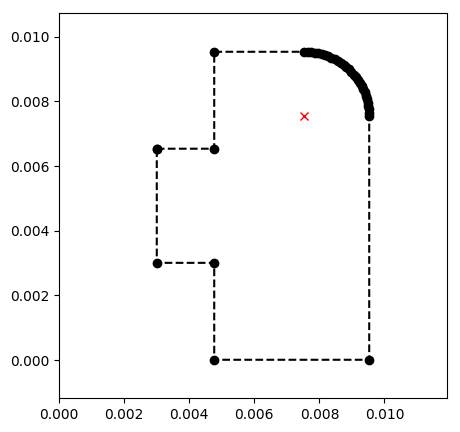

In [48]:
Rhub = 0.375*0.02542        # (m) radius of hub
Rinn = Rhub/2               # (m) inner hole radius
Rsec1 = Rinn                # (m) radius of first hole
Rsec2 = 3/1000              # (m) radius of second hole
Thub = Rhub                 # (m) thickness of hub
dsec1 = 3/1000              # (m) depth of first hole

Rfillet = 2/1000            # (m) Fillet radius
Nfillet = 30                # Points along fillet
Cfillet = [Rhub, Thub]-Rfillet      # Center of fillet

points_fillet = [Cfillet + Rfillet*[sin(a), cos(a)] 
                        for a in linspace(0,pi/2,Nfillet)]

points = hcat(
              [Rsec2, Thub-dsec1],
              [Rsec1, Thub-dsec1],
              [Rsec1, Thub],
              points_fillet...,
              [Rhub, 0],
              [Rsec1, 0],
              [Rsec1, dsec1],
              [Rsec2, dsec1],
              [Rsec2, Thub-dsec1]
             )'

x = [points[i,1] for i in 1:size(points,1)]
y = [points[i,2] for i in 1:size(points,1)]

PyPlot.figure(figsize=(5,5))
PyPlot.plot(x,y, "--ok")
PyPlot.plot([Cfillet[1]], [Cfillet[2]], "xr")
PyPlot.xlim([0, Rhub*1.25])
PyPlot.ylim([-Rhub*0.125, Rhub*1.125]);

Then we revolve it:

In [49]:
file_name = "hub00"

thetaNDIVS = 180          # Number of angular sections
loop_dim = 1             # Loops the parametric grid

# Creates body of revolution
grid = gt.surface_revolution(points, thetaNDIVS; loop_dim=loop_dim)

dimsplit = 1
triang_grid = gt.GridTriangleSurface(grid, dimsplit)

# Save vtk and call paraview
gt.save(triang_grid, file_name; path=save_path)
run(`paraview --data=$(joinpath(save_path, file_name)).vtk`)

In [50]:
Agrid = gt.get_area(triang_grid)
Aana = NaN

Vgrid = gt.get_volume(triang_grid)
Vana = NaN

Cgrid = gt.get_centroid(triang_grid)
Cana = [0, 0, NaN]

println("Property\tAnalytic\tGrid")
println("-"^40)
println("Area\t\t$(round(Aana,4))\t\t$(round(Agrid,4))")
println("Volume\t\t$(round(Vana,4))\t\t$(round(Vgrid,4))")
println("Centroid\t$(round.(Cana,4))\t$(round.(Cgrid,4))")

Property	Analytic	Grid
----------------------------------------
Area		NaN		0.0013
Volume		NaN		0.0
Centroid	[0.0, 0.0, NaN]	[-0.0, -0.0, 0.0047]


## Example &ndash; Wing: Lofted Body and Object Definition

<img src="vid/wing05.gif" alt="Vid here" style="width: 900px;"/>

In [51]:
file_name = "paneledwing02"     # Output file name


# ----------------- GEOMETRY DESCRIPTION -------------------------------------------
semispan = 1.0                      # (m) semi-span length

chords = [0.00 0.25;                # (semi-span position, chord c/semib)
          0.25 0.20;
          1.00 0.10]

twists = [0.0 5;                    # (semi-span position, twist (deg))
          1.0 0]

x_pos = [0.00 0;                    # (semi-span position, LE x-position x/semib)
         0.25 1/40;
         1.00 1/8;]

z_pos = [0.00 0;                    # (semi-span position, LE x-position x/semib)
         0.25 1/100;
         1.00 1/50]


airfoil_files = [(0.0, "naca6412.dat"), # (semi-span position, airfoil file)
                 (1.0, "naca6412.dat")]


# ----------------- MESHING PARAMETERS ---------------------------------------------
urfl_NDIVS = [(0.25, 10,   10.0, false),       # Cells on upper side of airfoils
              (0.50,  7,    1.0, true),
              (0.25,  8, 1/10.0, false)]                    
lrfl_NDIVS = urfl_NDIVS             # Cells on lower side of airfoils
b_NDIVS = [(1.0, 49, 20.0, true)]   # Span cell sections


# ----------------- LOFTING PARAMETERS ---------------------------------------------
b_low = -1.0                        # Lower bound of span lofting 
b_up = 1.0                          # Upper bound of span lofting
symmetric = true                    # Lofting symmetric about b=0
spl_k = 1                           # Spline order of distributions along span
spl_s = 0.0000001                   # Spline smoothing of distribution along span
verify_spline = false               # Plots the splined distributions
verify_rflspline = true             # Plots the splined airfoil cross sections
rflspl_s = 0.00000001               # Spline smoothing of airfoil cross sections.

# ----------------- GENERATE WING --------------------------------------------------
wing = gt.generate_loft(airfoil_files, airfoil_path, urfl_NDIVS, lrfl_NDIVS, 
                                        semispan, b_low, b_up, b_NDIVS, 
                                        chords, twists, x_pos, z_pos; 
                                        symmetric=symmetric, 
                                        spl_k=spl_k, spl_s=spl_s,
                                        verify_spline=verify_spline,
                                        verify_rflspline=false, 
                                        rflspl_s=rflspl_s
                                    )

dimsplit = 1
triang_grid = gt.GridTriangleSurface(wing, dimsplit)

# Save vtk and call paraview
gt.save(triang_grid, file_name; path=save_path)
run(`paraview --data=$(joinpath(save_path, file_name)).vtk`)

In [52]:
Agrid = gt.get_area(triang_grid)
Aana = NaN

Vgrid = gt.get_volume(triang_grid)
Vana = NaN

Cgrid = gt.get_centroid(triang_grid)
Cana = [NaN, NaN, NaN]

println("Property\tAnalytic\tGrid")
println("-"^40)
println("Area\t\t$(round(Aana,4))\t\t$(round(Agrid,4))")
println("Volume\t\t$(round(Vana,4))\t\t$(round(Vgrid,4))")
println("Centroid\t$(round.(Cana,4))\t$(round.(Cgrid,4))")

Property	Analytic	Grid
----------------------------------------
Area		NaN		0.6955
Volume		NaN		0.0044
Centroid	[NaN, NaN, NaN]	[0.1213, 0.0002, 0.0133]


Here now we use this grid to generate the massified object as wing made out of HD EPS foam:

In [53]:
# Wing component
wing_shape = ShapeSurfGrid(                     # Arbitrary surface grid shape
                        triang_grid,                # Triangular surface grid
                        "m"                         # Length units
               )
wing_obj = ObjectVol(                           # Volumetric object
                        wing_shape,                 # Shape
                        24.8,                       # (kg/m^3) HD EPS foam density
                        "kg/m^3"                    # Density units
               );

And we can use our grid to estimate its actual mass and center of gravity:

In [56]:
println("Mass:\t\t\t",   mass(wing_obj), massunits(wing_obj))
println("Center of gravity:\t", cg(wing_obj), cgunits(wing_obj))

Mass:			0.11029675888638996kg
Center of gravity:	[0.121319, 0.000208685, 0.0133229]m


And we get that this 2m-span HD EPS foam wing weights 110g. That's pretty reasonable.

# Example &ndash; Wing + Propulsion System

In order to show how everything starts to fit together, here I define a system of a wing fixed at $5^\circ$ angle of attack with propulsion system (motor + propellers).

<img src="vid/aircraft01.gif" alt="Vid here" style="width: 900px;"/>

First we generate the wing grid as a lofted body:

In [58]:
# ----------------- GEOMETRY DESCRIPTION -------------------------------------------
semispan = 1.0                      # (m) semi-span length

chords = [0.00 0.25;                # (semi-span position, chord c/semib)
          0.25 0.20;
          1.00 0.10]

twists = [0.0 5;                    # (semi-span position, twist (deg))
          1.0 0]

x_pos = [0.00 0;                    # (semi-span position, LE x-position x/semib)
         0.25 1/40;
         1.00 1/8;]

z_pos = [0.00 0;                    # (semi-span position, LE x-position x/semib)
         0.25 1/100;
         1.00 1/50]


airfoil_files = [(0.0, "naca6412.dat"), # (semi-span position, airfoil file)
                 (1.0, "naca6412.dat")]


# ----------------- MESHING PARAMETERS ---------------------------------------------
urfl_NDIVS = [(0.25, 10,   10.0, false),       # Cells on upper side of airfoils
              (0.50,  7,    1.0, true),
              (0.25,  8, 1/10.0, false)]                    
lrfl_NDIVS = urfl_NDIVS             # Cells on lower side of airfoils
b_NDIVS = [(1.0, 49, 20.0, true)]   # Span cell sections


# ----------------- LOFTING PARAMETERS ---------------------------------------------
b_low = -1.0                        # Lower bound of span lofting 
b_up = 1.0                          # Upper bound of span lofting
symmetric = true                    # Lofting symmetric about b=0
spl_k = 1                           # Spline order of distributions along span
spl_s = 0.0000001                   # Spline smoothing of distribution along span
verify_spline = false               # Plots the splined distributions
verify_rflspline = true             # Plots the splined airfoil cross sections
rflspl_s = 0.00000001               # Spline smoothing of airfoil cross sections.

# ----------------- GENERATE WING --------------------------------------------------
wing_orggrid = gt.generate_loft(airfoil_files, airfoil_path, urfl_NDIVS, lrfl_NDIVS, 
                                        semispan, b_low, b_up, b_NDIVS, 
                                        chords, twists, x_pos, z_pos; 
                                        symmetric=symmetric, 
                                        spl_k=spl_k, spl_s=spl_s,
                                        verify_spline=verify_spline,
                                        verify_rflspline=false, 
                                        rflspl_s=rflspl_s
                                    )

dimsplit = 1
wing_grid = gt.GridTriangleSurface(wing_orggrid, dimsplit);

Then we use that surface grid to generate the shape, massified object, and component of the wing:

In [59]:
# Wing component
wing_shape = adt.ShapeSurfGrid(                     # Arbitrary surface grid shape
                        wing_grid,                  # Triangular surface grid
                        "m"                         # Length units
               )
wing_obj = adt.ObjectVol(                           # Volumetric object
                        wing_shape,                 # Shape
                        24.8,                       # (kg/m^3) HD EPS foam density
                        "kg/m^3"                    # Density units
               )
wing = adt.Component(                               # Component definition
                        "Wing",                     # Name
                        wing_obj;                   # Object
                        id="wingHDeps",             # Identifier
                        cost=3.0                    # $/unit
                       )

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Wing,wingHDeps,,,,,3.0,1,3.0


Now we create the rotor pods that go into the propulsion system, and then we place the propulsion system and the wing into an overall "aircraft" system:

In [63]:
# -------------- SYSTEMS ----------------------------------------------------------

# Rotor pod: motor + propeller
rotorpod = adt.System(
                        "Rotor pod",                # Name
                        [motor1000kv, prop8x4];     # Subcomponents
                        id="rotpod",                # Identifier
    
                        # Orientation of motor and prop: centerline (z-axis) 
                        # aligned with x-axis
                        subOaxis = [[0 1 0; 0 0 1; 1 0 0], [0 1 0; 0 0 1; 1 0 0]],
    
                        # Position of motor and prop: Rotor flush with motor face
                        subO=[zeros(3), [-prop8x4.subcomponents.shape.h, 0, 0]]
               )

# Propulsion system: One rotor pod at each side of the wing
propulsion = adt.System(
                        "Propulsion system",            # Name
                        [rotorpod, rotorpod];           # Subcomponents
    
                        # Position of rotor pods: left and right side of wing
                        subO=[[0, -0.35*semispan, 0], [0, 0.35*semispan, 0]]
              )

# Aircraft: wing + propulsion system
aircraft = adt.System(
                        "Fixed-wing Aircraft",          # Name
                        [wing, propulsion];             # Subcomponents
    
                        # Places the wing at 5deg angle of attack
                        subOaxis = [adt.rotation_matrix(0, 5.0, 0), eye(3)],
    
                        # Position of components: wing and propulsion system
                        subO=[[0, 0, 0], [0, 0, 0]]
              )

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Fixed-wing Aircraft,-1,"Wing, Propulsion system",,,,29.9,1,29.9
2,Wing,wingHDeps,,,,,3.0,1,3.0
3,Propulsion system,-1,"Rotor pod, Rotor pod",,,,26.9,1,26.9
4,Rotor pod,rotpod,"Motor 1000kv, Propeller",,,,13.45,2,26.9
5,Motor 1000kv,motor1000kv,,Turnigy D2830-11 1000kv Brushless Motor,"1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S)",https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html,11,2,22
6,Propeller,prop8x4,,APC 8x4.7 slow-flyer ropeller,,https://www.apcprop.com/product/8x4-7sf/,2.45,2,4.9


Bill of materials:

In [64]:
displaybom(aircraft)

,Name,ID,Subcomponents,Description,Comments,Vendor,$/unit,Units,Total cost ($)
1,Wing,wingHDeps,,,,,3.0,1,3.0
2,Motor 1000kv,motor1000kv,,Turnigy D2830-11 1000kv Brushless Motor,"1000kv, requires 30A ESC, suggested prop 8x4 (4S) ~ 10x7 (2S)",https://hobbyking.com/en_us/d2830-11-1000kv-brushless-motor.html,11,2,22
3,Propeller,prop8x4,,APC 8x4.7 slow-flyer ropeller,,https://www.apcprop.com/product/8x4-7sf/,2.45,2,4.9


Saves the shapes as VTKs and visualizes them in Paraview:

In [ ]:
str = adt.save_shape(aircraft; path=save_path)
run(`paraview --data=$(save_path)/$(str)`)